## Age Distribution

Older products are more likely to be recommended than the younger ones. That's why we need to know how many products were at least 6 months in the app

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_gbq

### Downloading the data

In [3]:
QUERY = """
SELECT
gtin
, age
FROM `peya-food-and-groceries.user_fiorella_dirosario.product_attributes_sep2020_sep2021` p 
"""

df = pandas_gbq.read_gbq(QUERY, project_id="peya-growth-and-onboarding")
df.to_csv("gtin_age.csv", index=False)

Downloading: 100%|██████████| 42889/42889 [00:02<00:00, 19745.52rows/s]


In [4]:
df = pd.read_csv("gtin_age.csv")

# Age is in days. I need it in years
df["age"] = df["age"] / 365

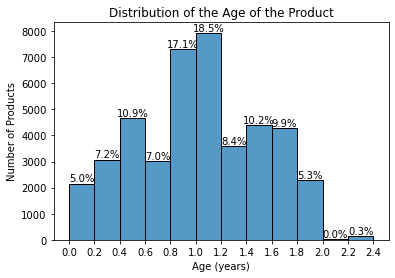

In [5]:

sns.histplot(data=df, x="age", bins=[x/10 for x in range(25) if (x % 2 == 0)])
plt.xlabel("Age (years)")
plt.ylabel("Number of Products")
plt.xticks([x/10 for x in range(25) if (x % 2 == 0)])
plt.title("Distribution of the Age of the Product")
total = df["gtin"].count()

ax = plt.gca()

if total > 0:
    for p in ax.patches:
        if pd.notna(p.get_height()):
            ax.text(p.get_x() + p.get_width() / 2., p.get_height(),
                       '{:.1%}'.format(float(p.get_height() / total)),
                       fontsize=10, color='black', ha='center', va='bottom')
        else:
            ax.text(p.get_x() + p.get_width() / 2., 0, '0', fontsize=10,
                       color='black', ha='center', va='bottom')
plt.show()